# LOW CODE ASSIGNMENTS PART 2

## **Pycaret: Association Rules Mining**

#### Installing required libraries

In [ ]:
!pip install mlxtend

In [ ]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<br>
<br>
<br>

### **Downloading the Groceries Dataset**

In [ ]:
!kaggle datasets download -d heeraldedhia/groceries-dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset URL: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset
License(s): GPL-2.0
  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 73.5MB/s]


In [ ]:
!unzip groceries-dataset.zip

Archive:  groceries-dataset.zip
  inflating: Groceries_dataset.csv   


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Loading required libraries**

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

<br>
<br>
<br>


### **Loading the Groceries Dataset**

In [ ]:
print("Loading Kaggle Groceries dataset...")
data = pd.read_csv('Groceries_dataset.csv')
data.head()

Loading Kaggle Groceries dataset...


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### **Grouping the data by Member_number and aggregating the items**

In [ ]:
print("Preprocessing data...")
transactions = data.groupby('Member_number')['itemDescription'].apply(list).reset_index()

Preprocessing data...


In [ ]:
transactions_list = transactions['itemDescription'].tolist()

# Creating TransactionEncoder object
te = TransactionEncoder()

### **Fit and transform the transactions**

In [ ]:
te_ary = te.fit(transactions_list).transform(transactions_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### **Applying Apriori algorithm**

In [ ]:
print("Applying Apriori algorithm...")
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

Applying Apriori algorithm...


,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)


### **Generating Association Rules**

First, with respect to "*lift*"

In [ ]:
print("Generating association rules...")
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules.head()

Generating association rules...


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
4,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801


Second, with respect to "*confidence*"

In [ ]:
print("Generating association rules...")
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.55)
rules.head()

Generating association rules...


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(canned vegetables),(whole milk),0.020523,0.458184,0.011544,0.562500,1.227674,0.002141,1.238437,0.189337
1,(cat food),(whole milk),0.043869,0.458184,0.024371,0.555556,1.212517,0.004272,1.219087,0.183311
2,(chewing gum),(whole milk),0.044638,0.458184,0.025654,0.574713,1.254328,0.005202,1.274001,0.212234
3,(chocolate),(whole milk),0.086455,0.458184,0.047973,0.554896,1.211078,0.008361,1.217281,0.190783
4,(condensed milk),(whole milk),0.023858,0.458184,0.013853,0.580645,1.267276,0.002922,1.292024,0.216061


### **Visualizations**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


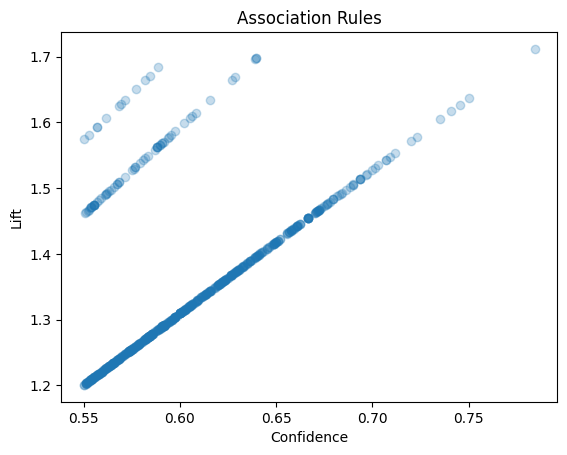

In [ ]:
import matplotlib.pyplot as plt

# Plot lift vs confidence
plt.scatter(rules['confidence'], rules['lift'], alpha=0.25)
plt.title('Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

### **Time for some analysis**:

Let's take the 'whole milk' as an example

In [ ]:
product = 'whole milk'
product_rules = rules[rules['antecedents'].apply(lambda x: product in x) |
                      rules['consequents'].apply(lambda x: product in x)]

print(f"\nRules involving {product}:")
print(product_rules.sort_values("lift", ascending=False).head(10))

print(f"\nTop 5 products most often bought with {product}:")
antecedent_rules = rules[rules['antecedents'].apply(lambda x: product in x)]
top_consequents = antecedent_rules.sort_values("lift", ascending=False)['consequents'].head()
for consequent in top_consequents:
    print(list(consequent - {product})[0])


Rules involving whole milk:
                                           antecedents         consequents  \
212                              (meat, domestic eggs)        (whole milk)   
521             (rolls/buns, frozen meals, whole milk)  (other vegetables)   
374                       (UHT-milk, soda, whole milk)  (other vegetables)   
639    (whole milk, other vegetables, yogurt, sausage)        (rolls/buns)   
520       (other vegetables, frozen meals, whole milk)        (rolls/buns)   
169                 (fruit/vegetable juice, chocolate)        (whole milk)   
536            (other vegetables, whole milk, napkins)        (rolls/buns)   
636  (other vegetables, bottled water, rolls/buns, ...        (whole milk)   
591                      (pastry, whole milk, sausage)        (rolls/buns)   
429                 (bottled water, pip fruit, yogurt)        (whole milk)   

     antecedent support  consequent support   support  confidence      lift  \
212            0.013084          

In [ ]:
# Additional analysis
print("\nMost frequent items:")
print(frequent_itemsets.sort_values("support", ascending=False).head(10))

print("\nNumber of transactions:", len(transactions))
print("Number of unique items:", len(te.columns_))


Most frequent items:
       support                        itemsets
113   0.458184                    (whole milk)
69    0.376603              (other vegetables)
84    0.349666                    (rolls/buns)
94    0.313494                          (soda)
114   0.282966                        (yogurt)
106   0.233710                (tropical fruit)
85    0.230631               (root vegetables)
7     0.213699                 (bottled water)
89    0.206003                       (sausage)
1050  0.191380  (other vegetables, whole milk)

Number of transactions: 3898
Number of unique items: 167
